# Homework 3

In [1]:
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
import torch.utils.data
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import typing as T

# Training outputs are cleared to avoid clutter
# High Resolution version of the output graphs can be found in the ./output-graphs directory

## Q1. Tutorial Code

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
 ship   cat  ship horse
[1,  2000] loss: 2.177
[1,  4000] loss: 1.838
[1,  6000] loss: 1.659
[1,  8000] loss: 1.571
[1, 10000] loss: 1.518
[1, 12000] loss: 1.465
[2,  2000] loss: 1.385
[2,  4000] loss: 1.371
[2,  6000] loss: 1.329
[2,  8000] loss: 1.315
[2, 10000] loss: 1.314
[2, 12000] loss: 1.273
Finished Training
GroundTruth:    cat  ship  ship plane
Predicted:    cat plane plane plane
Accuracy of the network on the 10000 test images: 53 %
Accuracy of plane : 70 %
Accuracy of   car : 59 %
Accuracy of  bird : 64 %
Accuracy of   cat : 28 %
Accuracy of  deer : 47 %
Accuracy of   dog : 34 %
Accuracy of  frog : 55 %
Accuracy of horse : 66 %
Accuracy of  ship : 59 %
Accuracy of truck : 54 %
cpu


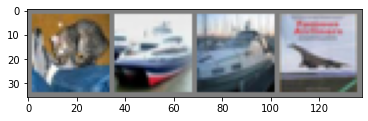

In [2]:
def RunTutorial():
    transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                              shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                            shuffle=False, num_workers=2)
    classes = ('plane', 'car', 'bird', 'cat',
              'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


    def imshow(img):
        img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))


    # # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


    ########################################################################
    # 2. Define a Convolution Neural Network

    class NetDefault(nn.Module):
        def __init__(self):
            super(NetDefault, self).__init__()
            self.conv1 = nn.Conv2d(3, 6, 5)
            self.pool = nn.MaxPool2d(2, 2)
            self.conv2 = nn.Conv2d(6, 16, 5)
            self.fc1 = nn.Linear(16 * 5 * 5, 120)
            self.fc2 = nn.Linear(120, 84)
            self.fc3 = nn.Linear(84, 10)

        # this goes from input all the way to the end
        def forward(self, x):
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            x = x.view(-1, 16 * 5 * 5)
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return x


    net = NetDefault()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(2):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training')


    # 5. Test the network on the test data
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    ########################################################################
    # Okay, now let us see what the neural network thinks these examples above are:

    outputs = net(images)

    ########################################################################
    # The outputs are energies for the 10 classes.

    _, predicted = torch.max(outputs, 1)
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))


    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)

RunTutorial()

## Load the Data separately for Q2 onwards

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Q2~7.

In [5]:
# Base class of NN's in all the questions
# Abstracts the following methods:
#   fit() for training
#   test() for tesing with a dataset
#   predict() for showing the result given a single image

INPUT_IMAGE_SHAPE = (32, 32, 3)
INPUT_IMAGE_SIZE = 32*32*3

class BaseNetHW(nn.Module):
    def __init__(self):
        super(BaseNetHW, self).__init__()
        self.classes = ('plane', 'car', 'bird', 'cat',
                        'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
        if self.__class__.__name__ == 'BaseNetHW':
            raise NameError(
                'This is the base class and the base constructor should not be directly called')

    def forward(self, x):
        if self.__class__.__name__ == 'BaseNetHW':
            raise NameError('Child must implement forward(self, x) method')
    
    @classmethod
    def imshow(cls, img):
        img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

    def fit(self,
            training_set: torch.utils.data.DataLoader,
            test_set: torch.utils.data.DataLoader,
            num_epochs=50,
            learning_rate=0.001):

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(
            self.parameters(), lr=learning_rate, momentum=0.9)

        self.training = True
        self.loss_history = np.zeros(shape=(num_epochs), dtype='float64')
        self.test_accuracy_history = np.zeros(shape=(num_epochs), dtype='float64')
        self.train_accuracy_history = np.zeros(shape=(num_epochs), dtype='float64')

        start = time.time()
        for epoch in range(num_epochs):
            epoch_loss = 0.0
            for i, data in enumerate(training_set, 0):
                inputs, labels = data  # get the inputs
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()  # zero the parameter gradients

                outputs = self.forward(inputs)  # forward + backward + optimize
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()

            # Record Loss, Train accuracy, and Test accuracy
            self.loss_history[epoch] = epoch_loss / len(training_set)
            self.train_accuracy_history[epoch] = self.test(
                training_set, set_name='Train')
            self.test_accuracy_history[epoch] = self.test(
                test_set, set_name='Test')

            print(f'Epoch {epoch+1}: loss={epoch_loss / len(training_set)},\
             train_accuracy: {self.train_accuracy_history[epoch]},\
             test_accuracy: {self.test_accuracy_history[epoch]}')

        end = time.time()
        print(f'Finished Training in {end-start} seconds')
        self.training = False

    def predict(self, test_set: torch.utils.data.DataLoader):
        data_iter = iter(test_set)
        images, labels = data_iter.next()

        # print images
        self.imshow(torchvision.utils.make_grid(images))
        print('GroundTruth: ', ' '.join('%5s' % self.classes[labels[j]] for j in range(4)))

        outputs = self(images)
        _, predicted = torch.max(outputs, 1)
        print('Predicted: ', ' '.join('%5s' % self.classes[predicted[j]] for j in range(4)))

    def test(self, test_set: torch.utils.data.DataLoader, set_name: str):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in test_set:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = self.forward(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print(f'{set_name} accuracy: %d %%' % (100 * correct / total))
        return correct / total

    def print_summary(self):
        print(self)


In [6]:
# Classes of networks for all the following questions

def override(f):
    # For notation only
    return f

def plot_and_save(net: BaseNetHW, file_path:str, plot_title:str, num_epochs=50):
    plt.rcParams['figure.figsize'] = [10, 4]  # type: ignore # make plots bigger

    fig, (ax1, ax2) = plt.subplots(1, 2) # type: ignore
    fig.suptitle(plot_title)

    ax1.plot(range(num_epochs), net.loss_history[0: num_epochs], label='Loss')
    ax1.title.set_text('Loss')
    ax1.set(xlabel='Epoch', ylabel='Loss')

    ax2.plot(range(num_epochs), net.test_accuracy_history[0: num_epochs], label='Test')
    ax2.plot(range(num_epochs), net.train_accuracy_history[0: num_epochs], label='Train')
    ax2.set(xlabel='Epoch', ylabel='Accuracy')
    ax2.legend()
    ax2.title.set_text('Accuracy')
    plt.savefig(file_path, dpi=300)


class NetQ2(BaseNetHW):
    @override
    def __init__(self):
        super(NetQ2, self).__init__()
        self.fc = nn.Linear(in_features=INPUT_IMAGE_SIZE, out_features=10)

    @override
    def forward(self, x: torch.Tensor):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc(x))
        return x


class NetQ3(BaseNetHW):
    @override
    def __init__(self, useReLU=True):
        super(NetQ3, self).__init__()
        self.useReLU = useReLU
        self.fc1 = nn.Linear(in_features=INPUT_IMAGE_SIZE, out_features=140)
        self.fc2 = nn.Linear(in_features=140, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    @override
    def forward(self, x: torch.Tensor):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x)) if self.useReLU else self.fc1(x)
        x = F.relu(self.fc2(x)) if self.useReLU else self.fc2(x)
        x = F.relu(self.fc3(x)) if self.useReLU else self.fc3(x)
        return x


class NetQ4567(BaseNetHW):
    @override
    def __init__(self):
        super(NetQ4567, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    @override
    def forward(self, x: torch.Tensor):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## Q2.

In [ ]:
Q2 = NetQ2()
print('The number of features are:')
Q2.print_summary()
Q2.to(device)
Q2.fit(training_set=trainloader, test_set=testloader)

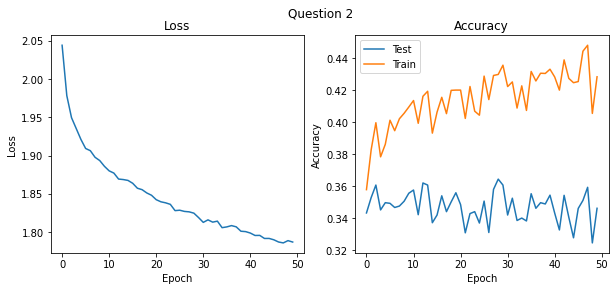

In [11]:
plot_and_save(Q2, file_path='./output-graphs/Q2.png', plot_title='Question 2')

There are $32\cdot32\cdot3 = 3072$ inputs, 10 outputs, so there are $3072 \cdot 10 =30720$ parameters in total.

Correction: I forgot the bias terms. For each output, there's 1 bias. So it should be $3072 \cdot 10  + 10=\boxed{30730}$

We can check with the following function:

In [36]:
# Source: https://stackoverflow.com/questions/49201236/check-the-total-number-of-parameters-in-a-pytorch-model
print(f'The total number of parameters is: {sum(p.numel() for p in Q2.parameters())}')

The total number of parameters is: 30730


## Q3.

In [ ]:
Q3NoReLU = NetQ3(useReLU=False)
Q3NoReLU.to(device)
Q3NoReLU.fit(training_set=trainloader, test_set=testloader, num_epochs=50)

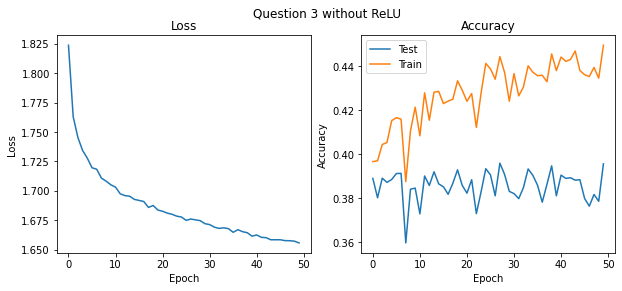

In [77]:
plot_and_save(Q3NoReLU, file_path='./output-graphs/Q3NoReLU.png', plot_title='Question 3 without ReLU')

If we don't use ReLU, the model seems to sturggle to produce a consistent output.

In [ ]:
Q3WithReLU = NetQ3(useReLU=True)
Q3WithReLU.to(device)
Q3WithReLU.fit(training_set=trainloader, test_set=testloader)


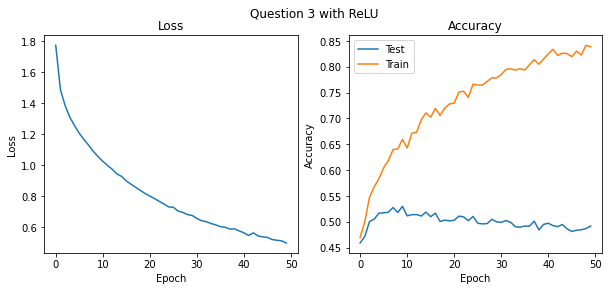

In [62]:
plot_and_save(Q3WithReLU, file_path='./output-graphs/Q3WithReLU.png', plot_title='Question 3 with ReLU')

If we use ReLU, we can see a consistent upward growing trend for the training accuracy. But the testing accuracy is not doing well possiblly due to the model being too simple.

## Q4 & Q5.

In [42]:
Q5_batchSize1 = NetQ4567()
Q5_batchSize1.to(device)

Q5_batchSize4 = NetQ4567()
Q5_batchSize4.to(device)

Q5_batchSize1000 = NetQ4567()
Q5_batchSize1000.to(device)

NetQ4567(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=140, bias=True)
  (fc2): Linear(in_features=140, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Batch Size = 1

In [ ]:
trainloader_1 = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)
Q5_batchSize1.fit(trainloader_1, testloader)

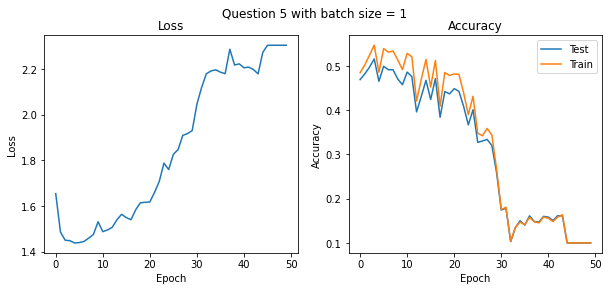

In [63]:
plot_and_save(Q5_batchSize1, file_path='./output-graphs/Q5_batchSize1.png', plot_title='Question 5 with batch size = 1')

The accuracy goes down because each individual image has too much influence on the weight updates. 

### Batch Size = 4

In [19]:
trainloader_4 = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
Q5_batchSize4.fit(trainloader_4, test_set=testloader)

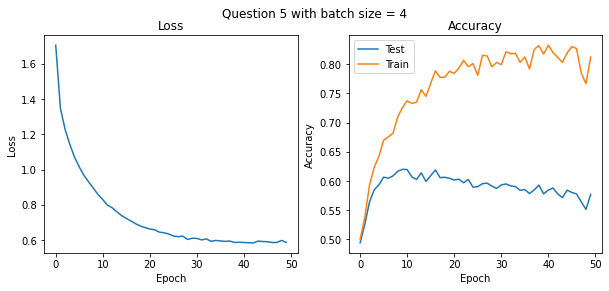

In [55]:
plot_and_save(Q5_batchSize4, file_path='./output-graphs/Q5_batchSize4.png', plot_title='Question 5 with batch size = 4')

### Batch Size = 1000

In [ ]:
trainloader_1000 = torch.utils.data.DataLoader(trainset, batch_size=1000, shuffle=True, num_workers=2)
Q5_batchSize1000.fit(trainloader_1000, test_set=testloader)

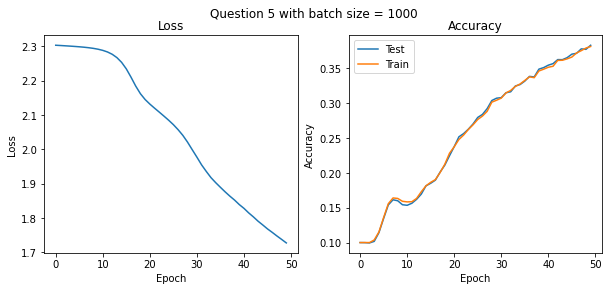

In [48]:
plot_and_save(Q5_batchSize1000, file_path='./output-graphs/Q5_batchSize1000.png', plot_title='Question 5 with batch size = 1000')

## Q6.

In [17]:
Q6_lr10 = NetQ4567()
Q6_lr01 = NetQ4567()
Q6_lr001 = NetQ4567()
Q6_lr00001 = NetQ4567()

### Learning Rate = 10


In [ ]:
Q6_lr10.to(device)
Q6_lr10.fit(trainloader_4, testloader, learning_rate=10)


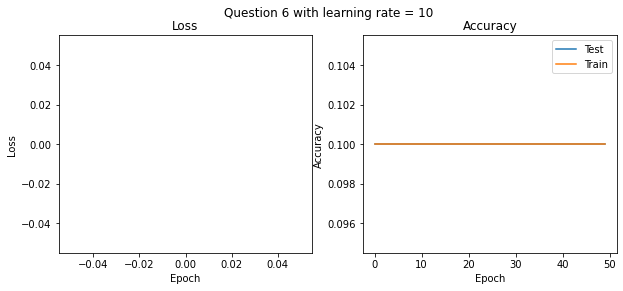

In [51]:
plot_and_save(Q6_lr10, file_path='./output-graphs/Q6_lr10.png', plot_title='Question 6 with learning rate = 10')

### Learning Rate = 0.1

In [ ]:
Q6_lr01.to(device)
Q6_lr01.fit(training_set=trainloader, test_set=testloader,learning_rate=0.1)

(40,)


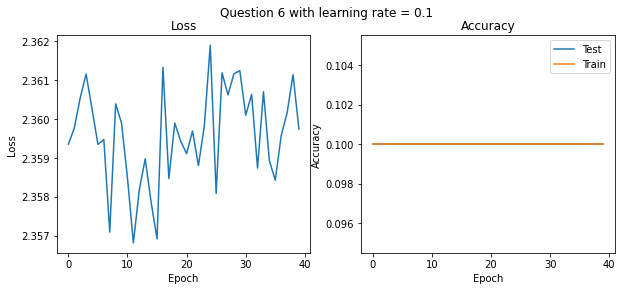

In [73]:
# Epochs end at 40 because all the training data killed the IO so python threw an resource unavailable error
plot_and_save(Q6_lr01, file_path='./output-graphs/Q6_lr01.png', plot_title='Question 6 with learning rate = 0.1', num_epochs=40)

With learning rates 10 and 0.1, the model is actually not learning anything becasue every time it update its weights, the large learning rate causes it to overshoot and completely miss the local minima. 

### Learning Rate = 0.01

In [ ]:
Q6_lr001.to(device)
Q6_lr001.fit(trainloader_4, testloader, learning_rate=0.01)


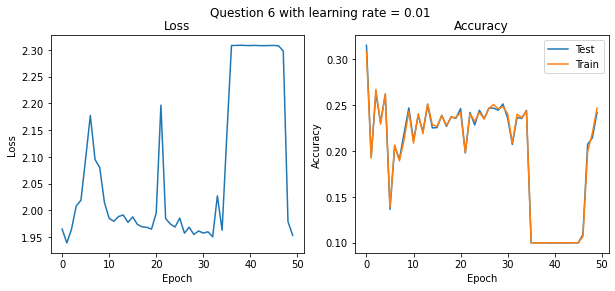

In [21]:
plot_and_save(Q6_lr001, file_path='./output-graphs/Q6_lr001.png', plot_title='Question 6 with learning rate = 0.01')

Similar problem that occurred in learning rates 10, 0.1 might have also happened here. The learning rate is still too large for this model that the accuracy starts to go down as we train for more epochs. 

### Learning Rate = 0.0001

In [ ]:
Q6_lr00001.to(device)
Q6_lr00001.fit(trainloader_4, testloader, learning_rate=0.0001)


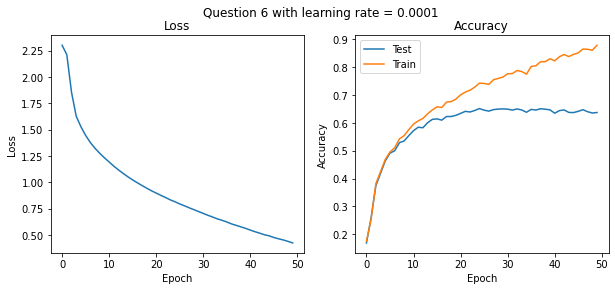

In [23]:
plot_and_save(Q6_lr00001, file_path='./output-graphs/Q6_lr00001.png', plot_title='Question 6 with learning rate = 0.0001')

Here the learning rate is a lot closer to becoming optimal. But we can still observe the increasing gap betwee training and testing loss. The cause might be that the model is starting to overfit at around 15 epochs. It's starting to memorize the answers of the training set rather than capturing features from the images. Q7 will help us prevent overfitting from happening.

## Q7.

In [28]:
Q7_Transform = transforms.Compose([
            transforms.RandomResizedCrop(32),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Q7_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                           download=False, transform=Q7_Transform)
Q7_testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=False, transform=Q7_Transform)
Q7trainloader = torch.utils.data.DataLoader(Q7_trainset, batch_size=4,
                                            shuffle=True, num_workers=2)
Q7testloader = torch.utils.data.DataLoader(Q7_testset, batch_size=4,
                                           shuffle=False, num_workers=2)
Q7 = NetQ4567()

In [ ]:
Q7.to(device)
Q7.fit(Q7trainloader, Q7testloader, learning_rate=0.001, num_epochs=25)

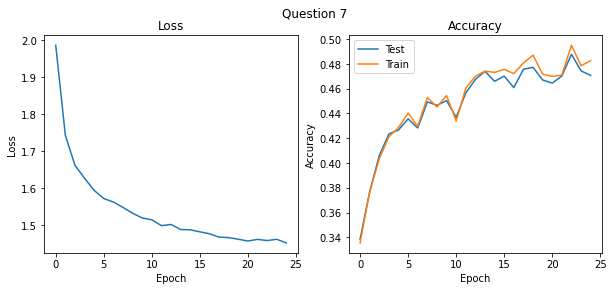

In [31]:
plot_and_save(Q7, file_path='./output-graphs/Q7.png', plot_title='Question 7', num_epochs=25)